In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [26]:
#Read in data
alz_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_nt.rds")
alz_nt_1k = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_nt_1k.rds")                                                   
alz_nt_5k = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_nt_5k.rds")                                                   
alz_nt_10k = readRDS("/gpfs/data/gilbert-lab/Lutz/Alzheimers/RDSfiles/alz_nt_10k.rds")


In [44]:
sample_tab = data.frame(sample_data(alz_nt))
names(sample_tab) <- c("SampleID", "BarcodeSequence", "LinkerPrimerSequence", "PrimerPlate", "PrimerWell", "Tube", "MouseTag", "Sex", "Treatment", "Sex_Treatment","FecalMassGm","Description")
head(sample_tab)

,SampleID,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,PrimerWell,Tube,MouseTag,Sex,Treatment,Sex_Treatment,FecalMassGm,Description
M1,M1,CTACAGGGTCTC,GTGTGYCAGCMGCCGCGGTAA,2,A1,1,3289,M,Control,M_Control,0.0539,M1
M29,M29,GCTGCCCACCTA,GTGTGYCAGCMGCCGCGGTAA,2,C5,29,3195,M,Abx_FMT,M_Abx_FMT,NA,M29
M7,M7,TGAGTCATTGAG,GTGTGYCAGCMGCCGCGGTAA,2,A7,7,3181,M,Control,M_Control,0.0417,M7
M26,M26,AGAGGGTGATCG,GTGTGYCAGCMGCCGCGGTAA,2,C2,26,3069,M,Abx,M_Abx,0.0387,M26
M44,M44,CTAATCAGAGTG,GTGTGYCAGCMGCCGCGGTAA,2,D8,44,2878,F,Abx,F_Abx,0.0382,M44
M31,M31,AGATCGTGCCTA,GTGTGYCAGCMGCCGCGGTAA,2,C7,31,3110,F,Control,F_Control,0.0171,M31


In [4]:
alz_nt_M = subset_samples(alz_nt, Sex=="M")
alz_nt_F = subset_samples(alz_nt, Sex=="F")

### Observed Richness

In [13]:
#Observed richness by treatment group - MALES

obs = estimate_richness(na.omit(alz_nt_M), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Treatment") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Treatment")

stats.obs = dfobs %>%
    group_by(Treatment) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Treatment, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$Treatment, method="bonferroni")
dunn

Treatment,median,mean,sd,sem
Abx,140.0,140.1,48.66998,15.39080
Abx_FMT,167.5,166.8,44.68109,14.12940
Control,183.0,181.9,55.07258,17.41548



	Kruskal-Wallis rank sum test

data:  Observed by Treatment
Kruskal-Wallis chi-squared = 3.2259, df = 2, p-value = 0.1993


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 3.2259, df = 2, p-value = 0.2


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |        Abx    Abx_FMT
---------+----------------------
 Abx_FMT |  -1.168531
         |     0.3639
         |
 Control |  -1.765498  -0.596967
         |     0.1162     0.8258

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 3.225879

$Z
[1] -1.168531 -1.765498 -0.596967

$P
[1] 0.12129629 0.03874004 0.27526471

$P.adjusted
[1] 0.3638889 0.1162201 0.8257941

$comparisons
[1] "Abx - Abx_FMT"     "Abx - Control"     "Abx_FMT - Control"

In [14]:
#Observed richness by treatment group - FEMALES

obs = estimate_richness(na.omit(alz_nt_F), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Treatment") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Treatment")

stats.obs = dfobs %>%
    group_by(Treatment) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Treatment, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$Treatment, method="bonferroni")
dunn

Treatment,median,mean,sd,sem
Abx,306,303.8000,98.1629,31.04184
Control,334,290.7778,128.2778,42.75927



	Kruskal-Wallis rank sum test

data:  Observed by Treatment
Kruskal-Wallis chi-squared = 0.0066667, df = 1, p-value = 0.9349


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 0.0067, df = 1, p-value = 0.93


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |        Abx
---------+-----------
 Control |   0.081649
         |     0.4675

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 0.006666667

$Z
[1] 0.08164966

$P
[1] 0.4674627

$P.adjusted
[1] 0.4674627

$comparisons
[1] "Abx - Control"

In [53]:
#Observed richness - treatment by sex

alz_nt_control = subset_samples(alz_nt, Treatment=="Control")

obs = estimate_richness(na.omit(alz_nt_control), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Sex") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Sex")

stats.obs = dfobs %>%
    group_by(Sex) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Sex, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$Sex, method="bonferroni")
dunn

Sex,median,mean,sd,sem
F,334,290.7778,128.27780,42.75927
M,183,181.9000,55.07258,17.41548



	Kruskal-Wallis rank sum test

data:  Observed by Sex
Kruskal-Wallis chi-squared = 3.6849, df = 1, p-value = 0.05491


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 3.6849, df = 1, p-value = 0.05


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          F
---------+-----------
       M |   1.919609
         |     0.0275

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 3.684899

$Z
[1] 1.919609

$P
[1] 0.02745365

$P.adjusted
[1] 0.02745365

$comparisons
[1] "F - M"

In [54]:
#Observed richness - treatment by sex

alz_nt_abx = subset_samples(alz_nt, Treatment=="Abx")

obs = estimate_richness(na.omit(alz_nt_abx), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Sex") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Sex")

stats.obs = dfobs %>%
    group_by(Sex) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Observed~Sex, data=dfobs)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfobs$Observed, g=dfobs$Sex, method="bonferroni")
dunn

Sex,median,mean,sd,sem
F,306,303.8,98.16290,31.04184
M,140,140.1,48.66998,15.39080



	Kruskal-Wallis rank sum test

data:  Observed by Sex
Kruskal-Wallis chi-squared = 11.063, df = 1, p-value = 0.0008807


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 11.0629, df = 1, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          F
---------+-----------
       M |   3.326087
         |    0.0004*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 11.06286

$Z
[1] 3.326087

$P
[1] 0.0004403716

$P.adjusted
[1] 0.0004403716

$comparisons
[1] "F - M"

### Shannon Index

In [30]:
#Shanon Index by treatment group - MALES

sha = estimate_richness(na.omit(alz_nt_1k_M), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Treatment") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Treatment")

stats.sha = dfsha %>%
    group_by(Treatment) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~Treatment, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$Treatment, method="bonferroni")
dunn

Treatment,median,mean,sd,sem
Abx,4.121182,3.677180,0.9184205,0.29043005
Abx_FMT,4.381399,4.304000,0.3114393,0.09848574
Control,4.349854,4.201408,0.5166722,0.16338608



	Kruskal-Wallis rank sum test

data:  Shannon by Treatment
Kruskal-Wallis chi-squared = 4.1884, df = 2, p-value = 0.1232


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 4.1884, df = 2, p-value = 0.12


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |        Abx    Abx_FMT
---------+----------------------
 Abx_FMT |  -1.905001
         |     0.0852
         |
 Control |  -1.600201   0.304800
         |     0.1643     1.0000

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 4.188387

$Z
[1] -1.9050019 -1.6002016  0.3048003

$P
[1] 0.02838991 0.05477693 0.38025912

$P.adjusted
[1] 0.08516974 0.16433080 1.00000000

$comparisons
[1] "Abx - Abx_FMT"     "Abx - Control"     "Abx_FMT - Control"

In [31]:
#Shanon Index by treatment group - FEMALES

sha = estimate_richness(na.omit(alz_nt_1k_F), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Treatment") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Treatment")

stats.sha = dfsha %>%
    group_by(Treatment) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~Treatment, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$Treatment, method="bonferroni")
dunn

Treatment,median,mean,sd,sem
Abx,3.890101,3.751124,0.7721164,0.2441646
Control,4.118350,4.058084,0.5315266,0.1771755



	Kruskal-Wallis rank sum test

data:  Shannon by Treatment
Kruskal-Wallis chi-squared = 0.32667, df = 1, p-value = 0.5676


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 0.3267, df = 1, p-value = 0.57


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |        Abx
---------+-----------
 Control |  -0.571547
         |     0.2838

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 0.3266667

$Z
[1] -0.5715476

$P
[1] 0.2838142

$P.adjusted
[1] 0.2838142

$comparisons
[1] "Abx - Control"

In [52]:
#Shannon richness - treatment by sex

alz_nt_control = subset_samples(alz_nt, Treatment=="Control")

sha = estimate_richness(na.omit(alz_nt_control), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Sex") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Sex")

stats.sha = dfsha %>%
    group_by(Sex) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~Sex, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$Sex, method="bonferroni")
dunn

Sex,median,mean,sd,sem
F,4.285696,4.207371,0.5202585,0.1734195
M,4.439775,4.275383,0.5166568,0.1633812



	Kruskal-Wallis rank sum test

data:  Shannon by Sex
Kruskal-Wallis chi-squared = 0.10667, df = 1, p-value = 0.744


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 0.1067, df = 1, p-value = 0.74


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          F
---------+-----------
       M |  -0.326598
         |     0.3720

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 0.1066667

$Z
[1] -0.3265986

$P
[1] 0.3719857

$P.adjusted
[1] 0.3719857

$comparisons
[1] "F - M"

In [51]:
#Shannon richness - treatment by sex

alz_nt_abx = subset_samples(alz_nt, Treatment=="Abx")

sha = estimate_richness(na.omit(alz_nt_abx), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Sex") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Sex")

stats.sha = dfsha %>%
    group_by(Sex) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~Sex, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$Sex, method="bonferroni")
dunn

Sex,median,mean,sd,sem
F,3.981240,3.885799,0.7922465,0.2505303
M,4.178726,3.750315,0.9232856,0.2919686



	Kruskal-Wallis rank sum test

data:  Shannon by Sex
Kruskal-Wallis chi-squared = 0.0057143, df = 1, p-value = 0.9397


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 0.0057, df = 1, p-value = 0.94


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          F
---------+-----------
       M |   0.075592
         |     0.4699

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 0.005714286

$Z
[1] 0.07559289

$P
[1] 0.4698715

$P.adjusted
[1] 0.4698715

$comparisons
[1] "F - M"

### Calculate Faith's PD

In [6]:
library(picante)

In [ ]:
#Code for rooting tree in qiime2
#Import tree
$ qiime tools import \
> --input-path rep_phylo.tre \
> --output-path rep_phylo.qza \
> --type 'Phylogeny[Unrooted]'
#Use midpoint rooting
$ qiime phylogeny midpoint-root \
> --i-tree rep_phylo.qza \
> --o-rooted-tree rep_phylo_rooted.qza
#Export tree as newick for ps
$qiime tools export \
> --input-path rep_phylo_rooted.qza \
> --output-path rep_phylo_rooted.tre


In [29]:
#Input data should be rooted newick tree (see codeblock above)
setwd("/gpfs/data/gilbert-lab/Lutz/Alzheimers/ps_files/")
tree <- read_tree("rep_phylo_rooted.tre/tree.nwk")
#...and OTU table as transformed matrix
alz_nt_otu = t(as.matrix(data.frame(otu_table(alz_nt))))
alz_nt_otu_1k = t(as.matrix(data.frame(otu_table(alz_nt_1k))))
alz_nt_otu_5k = t(as.matrix(data.frame(otu_table(alz_nt_5k))))
alz_nt_otu_10k = t(as.matrix(data.frame(otu_table(alz_nt_10k))))

In [30]:
alz.pd <- pd(alz_nt_otu, tree, include.root=TRUE)
alz_1k.pd <- pd(alz_nt_otu_1k, tree, include.root=TRUE)
alz_5k.pd <- pd(alz_nt_otu_5k, tree, include.root=TRUE)
alz_10k.pd <- pd(alz_nt_otu_10k, tree, include.root=TRUE)

In [37]:
alz.pd = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Adiv/FaithsPD.results.nonrare.csv", header=T)
alz_1k.pd = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Adiv/FaithsPD.results.1krare.csv")
alz_5k.pd = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Adiv/FaithsPD.results.5krare.csv")
alz_10k.pd = read.csv("/gpfs/data/gilbert-lab/Lutz/Alzheimers/Adiv/FaithsPD.results.10krare.csv")

In [39]:
#fix header
data = data.frame(sample_data(alz_nt))
names(data)[1]<-"SampleID"
#nonrare
alz_pd = left_join(data, alz.pd)
#1k rare
alz_pd_1k = left_join(data, alz_1k.pd)
#5k rare
alz_pd_5k = left_join(data, alz_5k.pd)
#10k rare
alz_pd_10k = left_join(data, alz_10k.pd)

Joining, by = "SampleID"
Joining, by = "SampleID"
Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining factors with different levels, coercing to character vector”Joining, by = "SampleID"
Warning message:
“Column `SampleID` joining factors with different levels, coercing to character vector”

#### Faith's PD - Non-rarefied

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


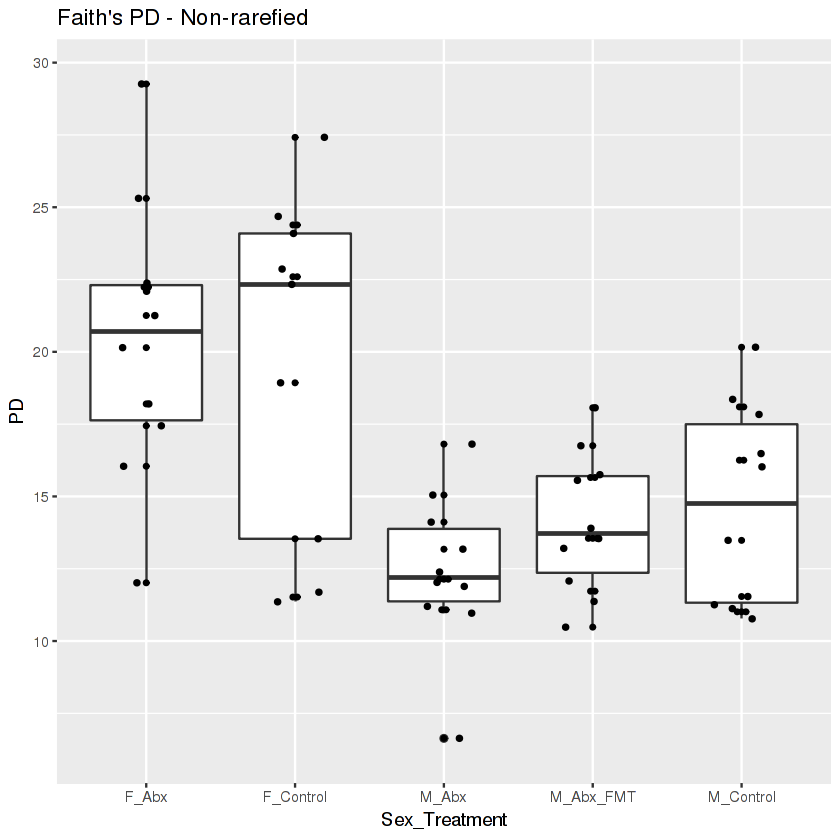

In [40]:
p = ggplot(alz_pd, aes(x=Sex_Treatment, y=PD)) + geom_boxplot() + ggtitle("Faith's PD - Non-rarefied")
p = p + geom_dotplot(binaxis='y', stackdir='center', dotsize=.2)
# Box plot with jittered points
# 0.2 : degree of jitter in x direction
p = p + geom_jitter(shape=16, position=position_jitter(0.2))
p

#### Faith's PD - 1k rarefied

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


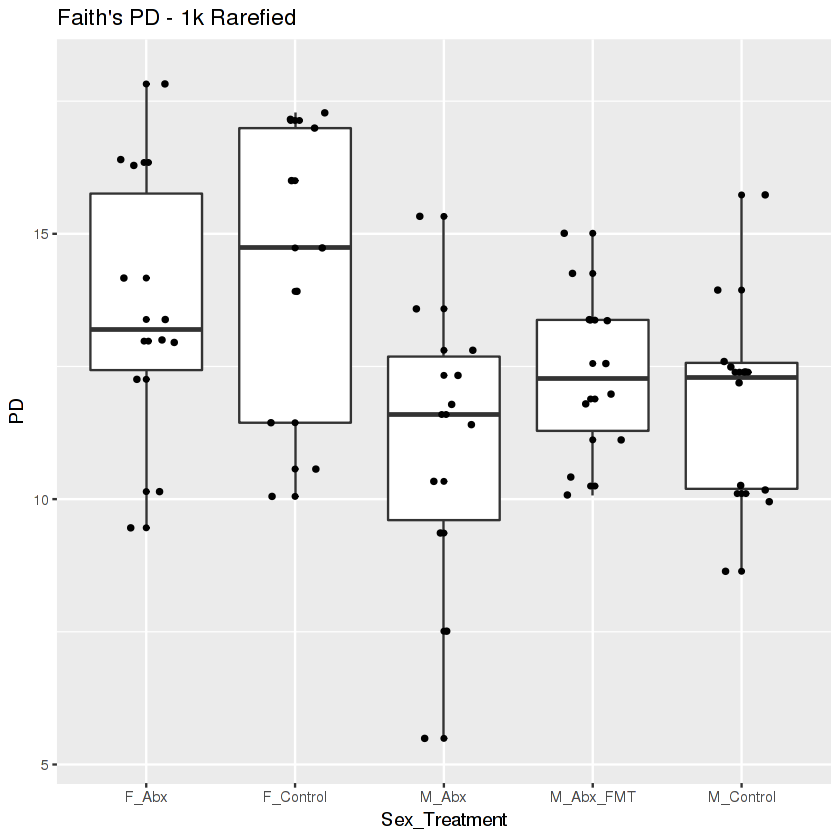

In [41]:
p = ggplot(alz_pd_1k, aes(x=Sex_Treatment, y=PD)) + geom_boxplot() + ggtitle("Faith's PD - 1k Rarefied")
p = p + geom_dotplot(binaxis='y', stackdir='center', dotsize=.2)
# Box plot with jittered points
# 0.2 : degree of jitter in x direction
p = p + geom_jitter(shape=16, position=position_jitter(0.2))
p

#### Faith's PD - 5k rarefied

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

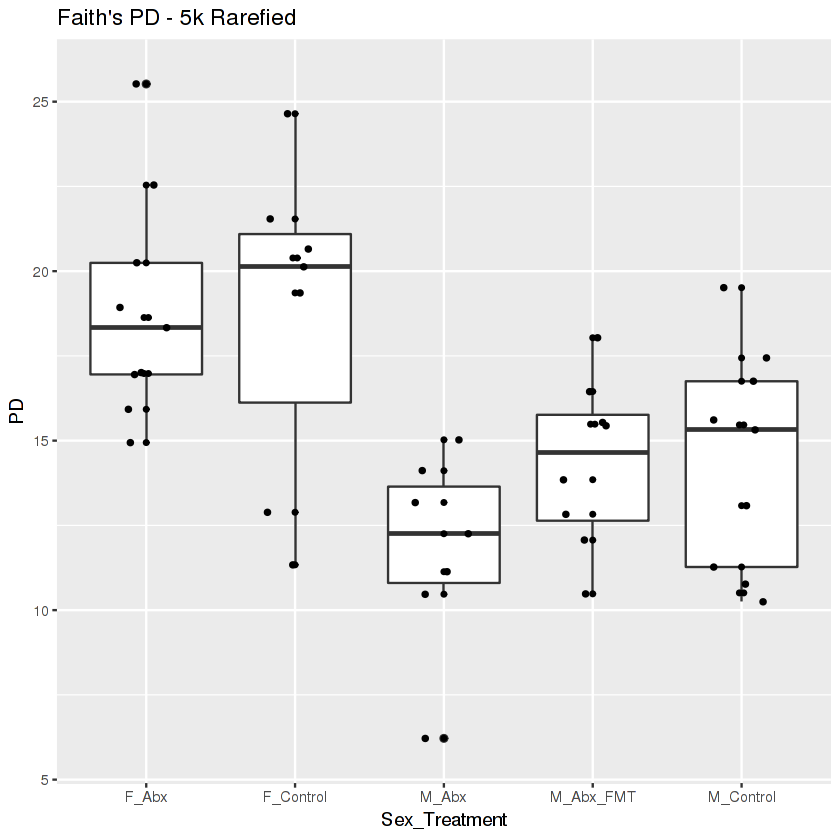

In [42]:
p = ggplot(alz_pd_5k, aes(x=Sex_Treatment, y=PD)) + geom_boxplot() + ggtitle("Faith's PD - 5k Rarefied")
p = p + geom_dotplot(binaxis='y', stackdir='center', dotsize=.2)
# Box plot with jittered points
# 0.2 : degree of jitter in x direction
p = p + geom_jitter(shape=16, position=position_jitter(0.2))
p

#### Faith's PD - 10k rarefied

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 15 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

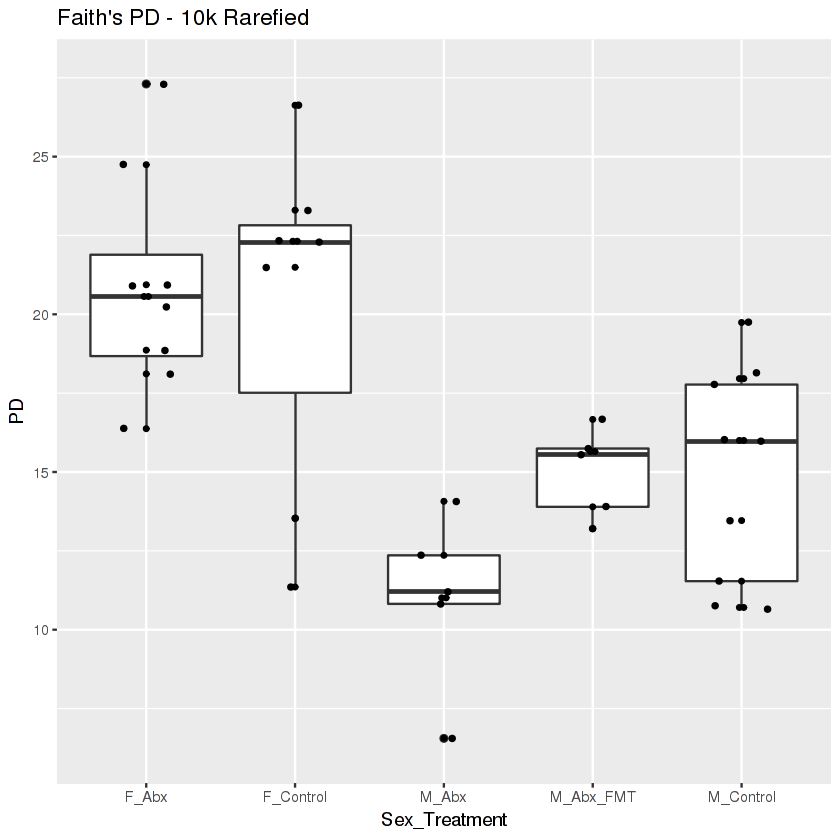

In [43]:
p = ggplot(alz_pd_10k, aes(x=Sex_Treatment, y=PD)) + geom_boxplot() + ggtitle("Faith's PD - 10k Rarefied")
p = p + geom_dotplot(binaxis='y', stackdir='center', dotsize=.2)
# Box plot with jittered points
# 0.2 : degree of jitter in x direction
p = p + geom_jitter(shape=16, position=position_jitter(0.2))
p